Diese Aufgabe soll das Verständnis für SLIC und die Weiterverarbeitung von (Über-)Segmentierungen vertiefen. Dazu betrachten wir als Bild eine Europakarte.

Das Bild wird zunächst geladen und angezeigt.

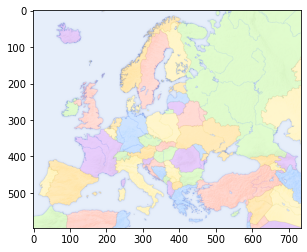

In [1]:
from skimage.io import imread
from skimage.segmentation import mark_boundaries, slic
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import label2rgb
from skimage.future.graph import rag, rag_mean_color, cut_threshold, show_rag

img = imread('karte.png')
plt.imshow(img, vmin=0, vmax=255)

Wendet nun SLIC auf das Bild an. Es sollen dabei zunächst 2000 Superpixel entstehen und die `compactness` soll 5 betragen. Visualisiert das Ergebnis. Werden die Elemente (hier Länder bzw. Wasserflächen) im Bild getrennt?

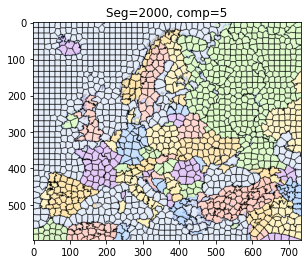

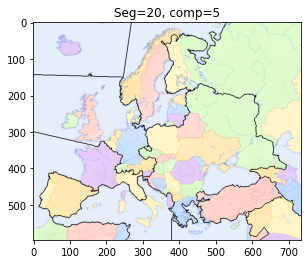

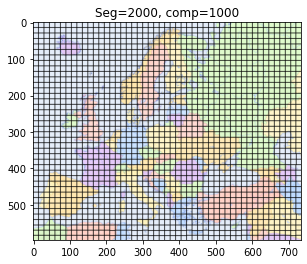

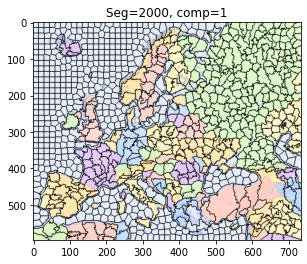

In [2]:
labels = slic(img, n_segments=2000, compactness=5.0, start_label=0)
vis = mark_boundaries(img, labels, mode="thick", color=(0,0,0))
plt.title("Seg=2000, comp=5")
plt.imshow(vis)
plt.show()

labels = slic(img, n_segments=20, compactness=5.0, start_label=0)
vis = mark_boundaries(img, labels, mode="thick", color=(0,0,0))
plt.title("Seg=20, comp=5")
plt.imshow(vis)
plt.show()

labels = slic(img, n_segments=2000, compactness=1000.0, start_label=0)
vis = mark_boundaries(img, labels, mode="thick", color=(0,0,0))
plt.title("Seg=2000, comp=1000")
plt.imshow(vis)
plt.show()

labels = slic(img, n_segments=2000, compactness=1.0, start_label=0)
vis = mark_boundaries(img, labels, mode="thick", color=(0,0,0))
plt.title("Seg=2000, comp=1")
plt.imshow(vis)
plt.show()

Wie verändert sich das Ergebnis, wenn statt 2000 nun 20 Superpixel erzeugt werden. Erscheint dies hier sinnvoll?

"Scheint sinnvoller, da man jetzt wenigstens Länder erkennt, aber zu grob"

Was passiert, wenn die `compactness` bei 2000 Superpixeln auf 1 oder 1000 verändert wird? Welche Rückschlüsse könnt ihr daraus auf die Bedeutung des Parameters ziehen?

"?"

**Für alle nachfolgenden Aufgaben sollen 2000 Superpixel und `compactness` = 5 genutzt werden.**

In [3]:
labels = slic(img, n_segments=2000, compactness=5.0, start_label=0)

Wie könnt ihr herausfinden, welches Superpixel ein bestimmtes Pixel (x,y) bedeckt?

Wie viele Superpixel gibt es in der Segmentierung wirklich?

In [4]:
#Wie könnt ihr herausfinden, welches Superpixel ein bestimmtes Pixel (x,y) bedeckt?
def getSuper(lab,y,x):
    return lab[y,x]

super = getSuper(labels,500,500) 
super #=>1237

#Wie viele Superpixel gibt es in der Segmentierung wirklich?
unis = np.unique(labels)
count = len(unis)
count #=>1472

1472

Wie lassen sich Informationen wie Größe (Anzahl Pixel) oder Mittelwert der RGB-Werte eines Superpixels ermitteln?



In [5]:
def getSM(labs, lab, img):
    rel = (labs==lab) #relevante Maske
    count = np.sum(rel) #Wieviele True's vorkamen
    rgbs = img[rel] #relevanten rgb-Werte
    meanR,meanG,meanB = np.mean(rgbs[:,0]),np.mean(rgbs[:,1]),np.mean(rgbs[:,2])
    return count,(meanR,meanG,meanB)

count,mean = getSM(labels, 100, img)
count,mean #=> (225, (230.0, 238.0, 250.0))

(225, (230.0, 238.0, 250.0))

Visualisiert ein Superpixel als binäres Bild.

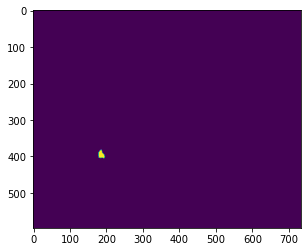

In [6]:
def getSup(labs, lab, img):
    rel = (labs==lab)
    plt.imshow(rel, vmax=1)
    plt.show()

getSup(labels, 999, img)

Welche Superpixel sind mit diesem Superpixel benachbart? Randpixel können ignoriert werden.

Erstellt nun einen RAG, dessen Kantengewichte den Differenzen der Mittelwerte der jeweiligen Superpixel entsprechen. Könnt ihr am entstandenen Graphen die Nachbarn desselben Superpixels ermitteln?

In [7]:
rag = rag_mean_color(img, labels)
#plt.imshow(rag)
list(rag.neighbors(999))

[977, 973, 1011, 1014, 1046]

Vereinigt nun ähnliche Superpixel, indem ihr alle Kanten aus dem RAG entfernt, deren Gewicht größer ist als 18. Es sollen also Superpixelgruppen aus ähnlichen Superpixlen entstehen. Zeigt die so entstandene Segmentierung mit `mark_boundaries` an. Werden die Länder nun einzeln markiert?

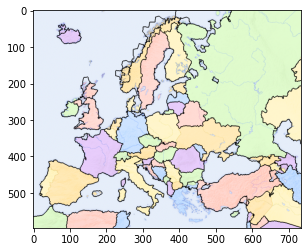

In [8]:
labelsNeu = cut_threshold(labels, rag, thresh=18, in_place=False)
plt.imshow(labelsNeu)
vis = mark_boundaries(img, labelsNeu, mode="thin", color=(0,0,0))
plt.imshow(vis)